Text(0, 0.5, 'Au')

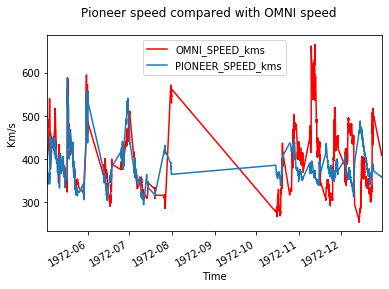

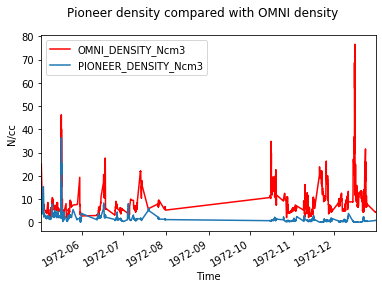

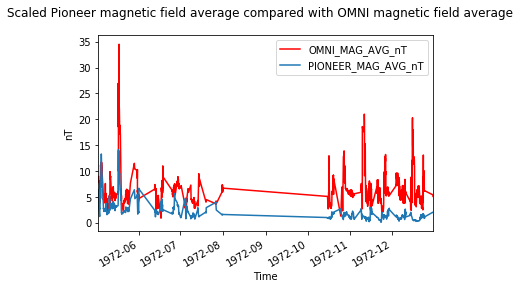

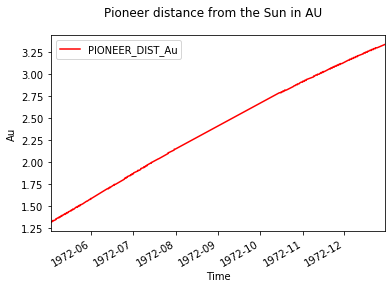

In [20]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer  05/01/1972 to 01/01/1973")

df = pd.read_csv('csv files/Pioneer6Mo1.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer6Mo1.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df.rename(columns = {'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ':'Time'}, inplace = True)

df['Time_offset_hours'] = df.apply(lambda row: int(round(41555 * (row.PIONEER_DIST_Au - 1) / row.PIONEER_SPEED_kms)), axis = 1)
df['new_time'] = df.apply(lambda row: row.Time - pd.Timedelta(hours = row.Time_offset_hours), axis = 1)


mF0 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF0 = mF0.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_DENSITY_Ncm3', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(3)
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_MAG_AVG_nT', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

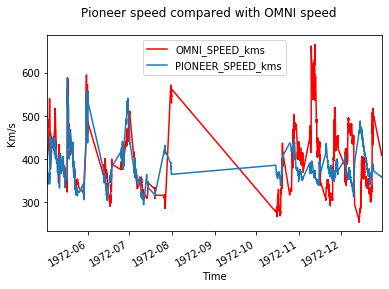

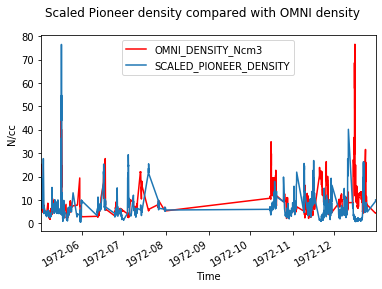

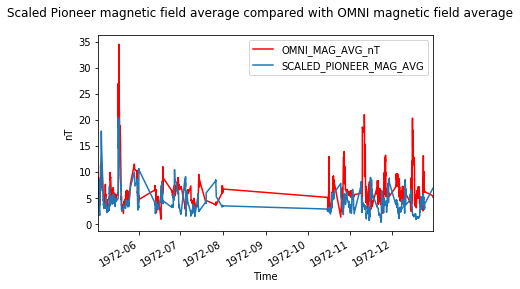

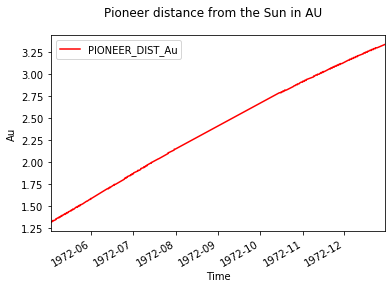

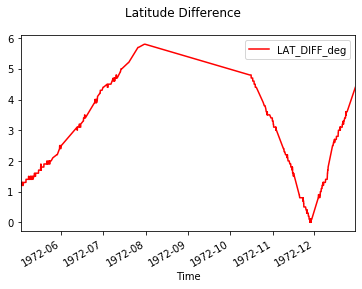

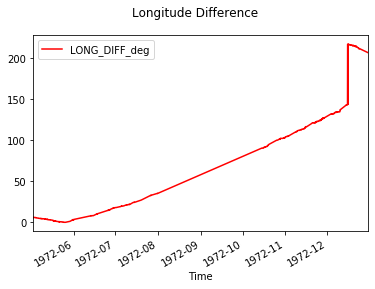

In [21]:
mF0['LAT_DIFF_deg'] = mF0.apply(lambda row: abs(row.OMNI_LAT_deg - row.PIONEER_LAT_deg), axis = 1)
mF0['LONG_DIFF_deg'] = mF0.apply(lambda row: abs(row.OMNI_LONG_deg - row.PIONEER_LONG_deg), axis = 1) 
mF0['SCALED_PIONEER_DENSITY'] = mF0.apply(lambda row: row.PIONEER_DENSITY_Ncm3 * row.PIONEER_DIST_Au * row.PIONEER_DIST_Au, axis = 1)
mF0['SCALED_PIONEER_MAG_AVG'] = mF0.apply(lambda row: row.PIONEER_MAG_AVG_nT * row.PIONEER_DIST_Au, axis = 1)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(2)
fig2.suptitle("Scaled Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='SCALED_PIONEER_DENSITY', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(3)
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='SCALED_PIONEER_MAG_AVG', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

fig5 = plt.figure(5)
fig5.suptitle("Latitude Difference")
az = plt.gca()
mF0.plot(kind='line', x='Time', y='LAT_DIFF_deg', color='red', ax=az)


fig6 = plt.figure(6)
fig6.suptitle("Longitude Difference")
az = plt.gca()
mF0.plot(kind='line', x='Time', y='LONG_DIFF_deg', color='red', ax=az)

C:\Users\Ian\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


Text(0, 0.5, 'nT Difference')

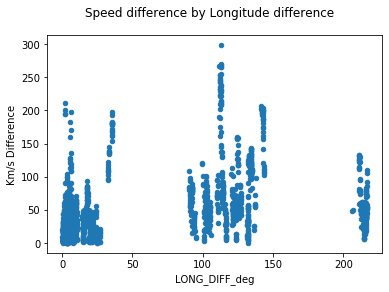

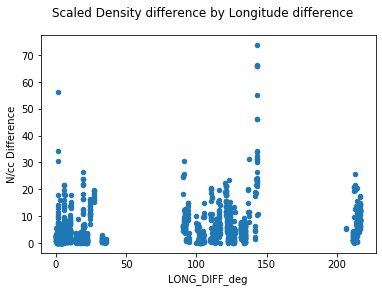

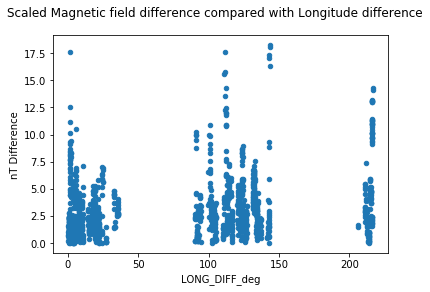

In [22]:
mF0['Speed_DIFF_Kms'] = mF0.apply(lambda row: abs(row.OMNI_SPEED_kms - row.PIONEER_SPEED_kms), axis = 1)
mF0['Density_DIFF_Ncc'] = mF0.apply(lambda row: abs(row.OMNI_DENSITY_Ncm3 - row.SCALED_PIONEER_DENSITY), axis = 1)
mF0['Mag_DIFF_nT'] = mF0.apply(lambda row: abs(row.OMNI_MAG_AVG_nT - row.SCALED_PIONEER_MAG_AVG), axis = 1)

fig1 = plt.figure(1)
fig1.suptitle("Speed difference by Longitude difference")
ax = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(2)
fig2.suptitle("Scaled Density difference by Longitude difference")
ay = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(3)
fig3.suptitle("Scaled Magnetic field difference compared with Longitude difference")
az = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

In [23]:
mF0.describe()

,OMNI_LAT_deg,OMNI_LONG_deg,OMNI_BR_nT,OMNI_BT_nT,OMNI_BN_nT,OMNI_MAG_AVG_nT,OMNI_SPEED_kms,OMNI_DENSITY_Ncm3,OMNI_TEMP_DegK,PIONEER_DIST_Au,...,PIONEER_DENSITY_Ncm3,PIONEER_TEMP_DegK,Time_offset_hours,LAT_DIFF_deg,LONG_DIFF_deg,SCALED_PIONEER_DENSITY,SCALED_PIONEER_MAG_AVG,Speed_DIFF_Kms,Density_DIFF_Ncc,Mag_DIFF_nT
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,...,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,1.199074,221.705128,-0.111823,-0.102991,0.561396,6.479060,399.287037,8.845726,102296.503561,2.400627,...,1.683057,32250.145299,153.842593,2.514387,77.110826,6.802781,4.233653,56.163248,5.440890,2.955261
std,2.929955,107.351457,3.734351,4.270695,3.090111,3.458078,72.633004,7.012340,81684.730495,0.749724,...,2.280624,44373.773718,83.749594,1.396536,70.978652,5.712382,2.575308,51.560827,7.102073,2.760427
min,-4.100000,0.000000,-21.300000,-23.400000,-9.100000,0.900000,254.000000,1.700000,11701.000000,1.320000,...,0.067800,371.000000,31.000000,0.000000,0.200000,0.430879,0.313544,0.000000,0.000349,0.010836
25%,-1.000000,159.200000,-3.000000,-2.700000,-1.200000,4.400000,346.000000,5.100000,46697.000000,1.590000,...,0.575650,12025.750000,67.000000,1.400000,6.000000,3.626911,2.775994,19.000000,1.024886,1.088658
50%,1.500000,203.600000,-0.100000,-0.150000,0.200000,5.750000,391.000000,6.700000,81013.500000,2.810000,...,1.073300,21223.500000,190.000000,2.200000,92.000000,5.572524,3.687798,43.900000,2.956340,2.187915
75%,3.325000,326.325000,2.800000,2.600000,2.000000,7.100000,443.000000,10.200000,132399.500000,3.110000,...,2.108225,36701.750000,230.000000,3.500000,125.100000,7.752207,4.967232,74.025000,7.294961,3.923288
max,6.400000,360.000000,11.300000,18.800000,19.900000,34.500000,666.000000,76.600000,646798.000000,3.340000,...,36.396400,667734.000000,292.000000,5.800000,216.600000,76.523431,20.464285,298.200000,73.637577,18.217328
